In [18]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm

In [19]:
# Fetching data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### For the "Median value of owner-occupied homes" provide a boxplot

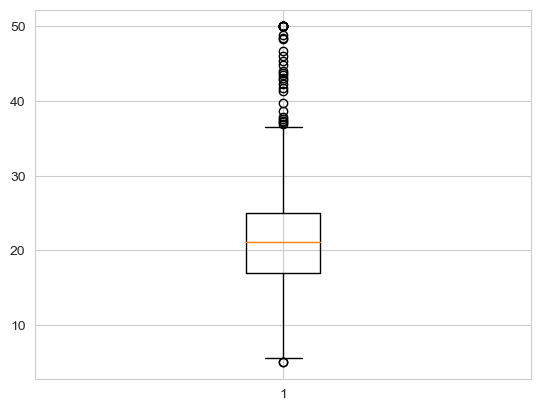

In [132]:
# Creating boxplot
plt.boxplot(boston_df['MEDV'])
plt.show()

#### Result:
We used the boxplot to visulaize the median in 'Median value of owner-occupied homes'. The Median Age is 21.

### Provide a  bar plot for the Charles river variable

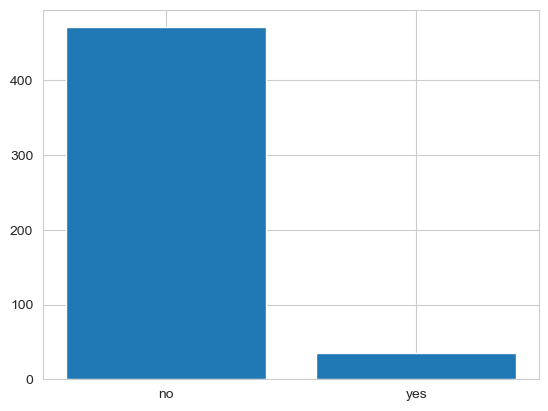

   CHAS RIVER
0   471    no
1    35   yes


In [134]:
for i,row in boston_df.iterrows():
    if row['CHAS']==0:
        boston_df.loc[boston_df.index[i], 'river'] = "no"
    elif row['CHAS']==1:
        boston_df.loc[boston_df.index[i], 'river'] = "yes"

x=boston_df['CHAS'].value_counts().to_frame()
x.index=x.index.astype(int)
x['RIVER']=['no','yes']
plt.bar(x.RIVER,height=x.CHAS)
plt.show()
print(x)

#### Result:
This is a bar chart for the tract bound by Charles river. It shows, the visual representation of the tracts, whihc are bound by charles river. Only 35 tracts are bound by Charles River and 471 were not. 

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

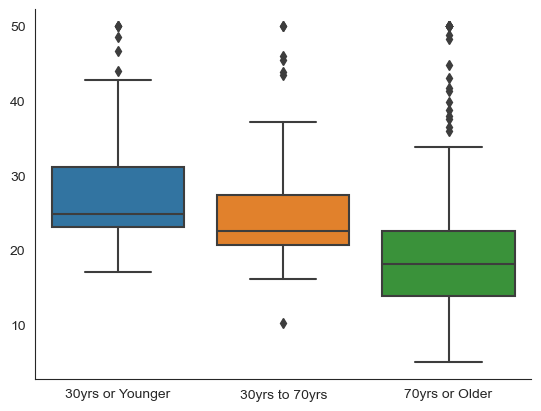

In [122]:
df1=boston_df[boston_df['AGE']<=35]
df2=boston_df[(boston_df['AGE']>35) & (boston_df['AGE']<70)]
df3=boston_df[boston_df['AGE']>=70]

fin_df = pd.DataFrame({'30yrs or Younger': df1['MEDV'], '30yrs to 70yrs': df2['MEDV'], '70yrs or Older': df3['MEDV']})
sns.set_style('white')
sns.boxplot(data=fin_df)
sns.despine()
plt.show()

#### Result:
This is a boxplot and a visual representation for the MEDV variable vs the AGE variable. It shows, the median values for different different age groups.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

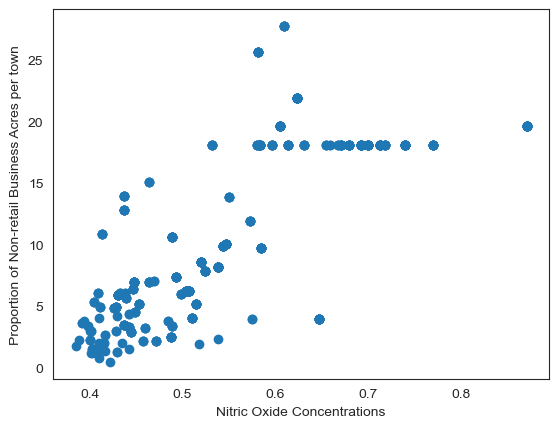

In [24]:
plt.scatter(boston_df['NOX'],boston_df['INDUS'])
plt.xlabel("Nitric Oxide Concentrations")
plt.ylabel("Proportion of Non-retail Business Acres per town")
plt.show()

#### Result:
This is a scatter plot and a visual representation for relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
As you can see, most of the nitric oxide(0.4 - 0.5 parts per 10 million) is in 0-7 acre per town.

### Create a histogram for the pupil to teacher ratio variable

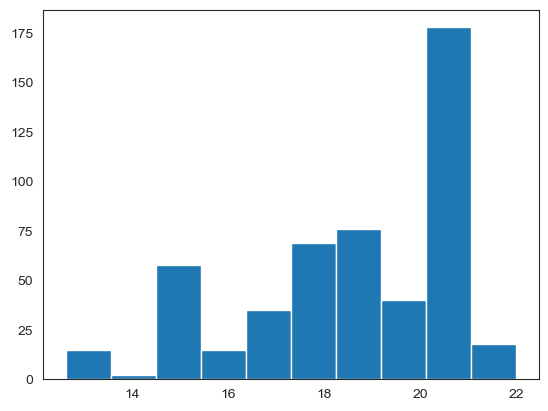

In [25]:
plt.hist(boston_df['PTRATIO'])
plt.show()

#### Result:
This is a scatter plot and a visual representation of pupil-teacher ratio by town is maxium in 20-22.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [131]:
import warnings
warnings.filterwarnings('ignore')
df1 = x[boston_df['river']=='no']
df2 = boston_df[boston_df['river']=='yes']
df1['CHAS'].astype('int32')
df2['CHAS'].astype('int32')
scipy.stats.ttest_ind(df1['CHAS'].astype('int32'), df2['CHAS'].astype('int32'),equal_var=True)

Ttest_indResult(statistic=6.651371871712162, pvalue=1.0816810655325489e-07)

#### Result:
The P-Value for T-Test= 1.0816810655325489e-07. Which is less than 0.05. So there is a significant difference in median value of houses bounded by the Charles river or not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [115]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '30yrs or Younger']['AGE'],
                   boston_df[boston_df['age_group'] == '30yrs to 70yrs']['AGE'], 
                   boston_df[boston_df['age_group'] == '70yrs or Older']['AGE'], 
                   center='mean')
thirty_lower = boston_df[boston_df['age_group'] == '30yrs or Younger']['AGE']
thirty_seventy = boston_df[boston_df['age_group'] == '30yrs to 70yrs']['AGE']
seventy_older = boston_df[boston_df['age_group'] == '70yrs or Older']['AGE']
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower, thirty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 2162.99425724172, P-Value: 9.005770381051771e-248


#### Result:
The P-Value for T-Test= 9.005770381051771e-248. Which is less than 0.05. So there is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [118]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

#### Result:
The P-Value for T-Test= 7.913361061240043e-98. Which is less than 0.05. So there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [133]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        20:02:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Result:
The P-Value for T-Test= 0.000. Which is less than 0.05. So there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.